In [1]:
import json
import random
import re
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import warnings

import matplotlib.cm as cm
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.preprocessing import scale
from sklearn.preprocessing import Normalizer
import sklearn.metrics as metrics
import scipy.sparse.linalg as linalg

from nltk.corpus import stopwords

from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm


import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [6]:
guest_df = pd.read_excel("GuestSurvey.xlsx")
guest_df.head()

,Program Term: Program Term Name,Assessment: Assessment Name,Participant for this Assessment: First Name,Participant for this Assessment: Last Name,Date,Age of contact,Do you have children?,Do children live with you?,Currently in school?,Current: kind of school or training?,...,Where last 12 month: outside/street/car,Where last 12 month: own rental room/apt,Where last 12 month: shelter or hotel,Where last 12 month: transitional housin,Where last 12 months: place fam rent/own,Where are you staying tonight?,Where are you staying this past week?,Length of stay past week,Last permanent zip code,Assessment: Record Type
0,Y2Y Harvard Square Fall 2016,AS-00002843,Chinier,Bennett,2016-11-01,19,NaN,NaN,NaN,NaN,...,0,0,0,0,0,NaN,NaN,NaN,NaN,Guest Survey-Intake 2
1,Y2Y Harvard Square Fall 2016,AS-00004001,Rashad,Jackson,2017-04-07,23,No,NaN,Yes,GED program GED program,...,0,0,1,0,0,240 Albany Street,240 Albany Street,1-2 years,NaN,Guest Survey-Intake 2
2,Y2Y Harvard Square Fall 2016,AS-00002671,Hector,Lopez,2016-10-16,25,Yes,No,No,NaN,...,1,0,1,0,0,Boston on the streets,"Boston, on the street",2+ years,01613,Guest Survey-Intake 2
3,Y2Y Harvard Square Fall 2016,AS-00002672,Evangeline,Durand,2016-10-16,22,No,NaN,No,NaN,...,1,0,1,0,0,friend's house or outside,friend's house,2-4 weeks,02149,Guest Survey-Intake 2
4,Y2Y Harvard Square Fall 2016,AS-00002673,"Deron ""Smitty""",Smith,2016-10-16,23,No,NaN,No,NaN,...,1,0,1,0,0,Outside,Outside,2+ years,NaN,Guest Survey-Intake 2


In [7]:
exit_survey_df = pd.read_excel("ExitSurveys_10.15.16-4.15.17-rv4.18.17.xlsx")
exit_survey_df.head()

,Full Name,Assessment Name,Safety Feeling at Y2Y - Score,Satisfactioin experience at Y2Y - Score,Recommend Y2Y to Friends to Stay - Score,Satisfaction with Food - Score,Did Y2Y help meet personal goals - Score,Safety and Sanctuary - Notes,I'm in a better place after stay at Y2Y - Score,Stay with Y2Y helped better navigate services and systems for support - Score,...,Additional Workshops You Want - Score,Legal Productive - Score,Legal Yes - Notes,Legal Yes Referral Organization Success - Notes,Legal Yes Did not receive other resources - Notes,Medical Services - Score,Drop-in mental health professional and other service providers - Score,Advocacy and oportunities for guest leadership - Score,Workshop - Notes,What other workshops would you like to see - Notes
0,"Deron ""Smitty"" Smith",AS-00003022,7.0,7.0,7.0,7.0,7.0,Safety and Sanctuary section comments: recomme...,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments: n/a,Additional workshops you want? n/a
1,Widelande Jean,AS-00003023,7.0,3.0,6.0,6.0,6.0,Safety and Sanctuary section comments: there w...,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,6.0,NaN,6.0,Workshop comments: n/a,Additional workshops you want? n/a
2,Hector Lopez,AS-00003024,7.0,7.0,7.0,7.0,4.0,Safety and Sanctuary section comments: the wor...,4,6,...,6.0,7.0,Legal Yes comments? they knew what was going o...,Legal yes referral organizations and success:,Legal Yes did not receive other resources: no,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
3,Taylor Garcia,AS-00003025,6.0,6.0,3.0,6.0,5.0,Safety and Sanctuary section comments: Taylor ...,6,6,...,6.0,6.0,Legal Yes comments? started CORI sealing more ...,Legal yes referral organizations and success:,Legal Yes did not receive other resources: no,NaN,NaN,NaN,Workshop comments: Ran a cool workshop! get a ...,Additional workshops you want? resume-> help g...
4,Dyaunnhdre Oliveira,AS-00003050,4.0,5.0,5.0,7.0,NaN,Safety and Sanctuary section comments: Having ...,7,5,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,5.0,NaN,NaN,Workshop comments:,Additional workshops you want? High school dip...


In [13]:
guest_df["Full Name"] = guest_df["Participant for this Assessment: First Name"] + " " + guest_df["Participant for this Assessment: Last Name"]
guest_df.drop(guest_df[["Participant for this Assessment: First Name", "Participant for this Assessment: Last Name"]], axis=1, inplace=True)
guest_df.head()

,Program Term: Program Term Name,Assessment: Assessment Name,Date,Age of contact,Do you have children?,Do children live with you?,Currently in school?,Current: kind of school or training?,Chronic homelessness definition,Chronic disability definition,...,Where last 12 month: own rental room/apt,Where last 12 month: shelter or hotel,Where last 12 month: transitional housin,Where last 12 months: place fam rent/own,Where are you staying tonight?,Where are you staying this past week?,Length of stay past week,Last permanent zip code,Assessment: Record Type,Full Name
0,Y2Y Harvard Square Fall 2016,AS-00002843,2016-11-01,19,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,Guest Survey-Intake 2,Chinier Bennett
1,Y2Y Harvard Square Fall 2016,AS-00004001,2017-04-07,23,No,NaN,Yes,GED program GED program,Yes,Yes,...,0,1,0,0,240 Albany Street,240 Albany Street,1-2 years,NaN,Guest Survey-Intake 2,Rashad Jackson
2,Y2Y Harvard Square Fall 2016,AS-00002671,2016-10-16,25,Yes,No,No,NaN,Yes,Yes,...,0,1,0,0,Boston on the streets,"Boston, on the street",2+ years,01613,Guest Survey-Intake 2,Hector Lopez
3,Y2Y Harvard Square Fall 2016,AS-00002672,2016-10-16,22,No,NaN,No,NaN,Yes,Yes,...,0,1,0,0,friend's house or outside,friend's house,2-4 weeks,02149,Guest Survey-Intake 2,Evangeline Durand
4,Y2Y Harvard Square Fall 2016,AS-00002673,2016-10-16,23,No,NaN,No,NaN,Yes,No,...,0,1,0,0,Outside,Outside,2+ years,NaN,Guest Survey-Intake 2,"Deron ""Smitty"" Smith"


In [27]:
exit_survey_df[exit_survey_df["Full Name"].duplicated(keep=False)]

,Full Name,Assessment Name,Safety Feeling at Y2Y - Score,Satisfactioin experience at Y2Y - Score,Recommend Y2Y to Friends to Stay - Score,Satisfaction with Food - Score,Did Y2Y help meet personal goals - Score,Safety and Sanctuary - Notes,I'm in a better place after stay at Y2Y - Score,Stay with Y2Y helped better navigate services and systems for support - Score,...,Additional Workshops You Want - Score,Legal Productive - Score,Legal Yes - Notes,Legal Yes Referral Organization Success - Notes,Legal Yes Did not receive other resources - Notes,Medical Services - Score,Drop-in mental health professional and other service providers - Score,Advocacy and oportunities for guest leadership - Score,Workshop - Notes,What other workshops would you like to see - Notes
0,"Deron ""Smitty"" Smith",AS-00003022,7.0,7.0,7.0,7.0,7.0,Safety and Sanctuary section comments: recomme...,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments: n/a,Additional workshops you want? n/a
3,Taylor Garcia,AS-00003025,6.0,6.0,3.0,6.0,5.0,Safety and Sanctuary section comments: Taylor ...,6,6,...,6.0,6.0,Legal Yes comments? started CORI sealing more ...,Legal yes referral organizations and success:,Legal Yes did not receive other resources: no,NaN,NaN,NaN,Workshop comments: Ran a cool workshop! get a ...,Additional workshops you want? resume-> help g...
4,Dyaunnhdre Oliveira,AS-00003050,4.0,5.0,5.0,7.0,NaN,Safety and Sanctuary section comments: Having ...,7,5,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,5.0,NaN,NaN,Workshop comments:,Additional workshops you want? High school dip...
6,Jarid Pires,AS-00003052,7.0,7.0,7.0,7.0,7.0,Safety and Sanctuary section comments: Cool Be...,7,7,...,7.0,7.0,Legal Yes comments? Cool Beans Bro,Legal yes referral organizations and success: ...,Legal Yes did not receive other resources: Coo...,7.0,NaN,7.0,Workshop comments: Cool Beans Bro,Additional workshops you want? Cool Beans Bro....
7,Julien Cournoyer,AS-00003109,6.0,6.0,7.0,5.0,6.0,Safety and Sanctuary section comments: Wishes ...,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments: can't complain,Additional workshops you want? Finances (how t...
8,Shamell Ford,AS-00003110,7.0,7.0,7.0,5.0,7.0,Safety and Sanctuary section comments: Only th...,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
9,Norah Mulhern,AS-00003111,5.0,5.0,7.0,5.0,4.0,Safety and Sanctuary section comments: differe...,6,4,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
10,Corinne Downey,AS-00003112,6.0,7.0,7.0,6.0,7.0,Safety and Sanctuary section comments: carrots...,6,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,6.0,7.0,NaN,Workshop comments:,Additional workshops you want? arts + crafts; ...
11,Justin Schlipstein,AS-00003113,7.0,7.0,7.0,5.0,6.0,Safety and Sanctuary section comments: na/; le...,4,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,7.0,Workshop comments:,Additional workshops you want? cooking; tae kw...
13,Roger Moraldo,AS-00003115,NaN,NaN,NaN,NaN,NaN,Safety and Sanctuary section comments:,3,4,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,5.0,5.0,NaN,Workshop comments: More emphasis on communicat...,Additional workshops you want?


In [31]:
test_groupby = guest_df.groupby("Full Name")
test_1 = test_groupby.count().unstack('Full Name').fillna(0)
test_1

                                 Full Name                
Program Term: Program Term Name  Aaliyah Franck               1
                                 Aaron Xu                     1
                                 Abigail Squires              1
                                 Anthony Moore                1
                                 Ayisha Eddins                1
                                 Chinier Bennett              1
                                 Christopher Carroll          1
                                 Corinne Downey               1
                                 Deanna Blake                 1
                                 Deron "Smitty" Smith         1
                                 Derrell Ritchie              1
                                 Dominic Orcel                1
                                 Dorell Brimage               1
                                 Dusten Roderick              1
                                 Dyaunnhdre O

In [69]:
guest_exit_unique = list(set(guest_df['Full Name']).intersection(exit_survey_df["Full Name"]))
guest_uniq_df = guest_df[guest_df['Full Name'].isin(guest_exit_unique)]
guest_uniq_df

,Program Term: Program Term Name,Assessment: Assessment Name,Date,Age of contact,Do you have children?,Do children live with you?,Currently in school?,Current: kind of school or training?,Chronic homelessness definition,Chronic disability definition,...,Where last 12 month: own rental room/apt,Where last 12 month: shelter or hotel,Where last 12 month: transitional housin,Where last 12 months: place fam rent/own,Where are you staying tonight?,Where are you staying this past week?,Length of stay past week,Last permanent zip code,Assessment: Record Type,Full Name
0,Y2Y Harvard Square Fall 2016,AS-00002843,2016-11-01,19,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,Guest Survey-Intake 2,Chinier Bennett
1,Y2Y Harvard Square Fall 2016,AS-00004001,2017-04-07,23,No,NaN,Yes,GED program GED program,Yes,Yes,...,0,1,0,0,240 Albany Street,240 Albany Street,1-2 years,NaN,Guest Survey-Intake 2,Rashad Jackson
2,Y2Y Harvard Square Fall 2016,AS-00002671,2016-10-16,25,Yes,No,No,NaN,Yes,Yes,...,0,1,0,0,Boston on the streets,"Boston, on the street",2+ years,01613,Guest Survey-Intake 2,Hector Lopez
3,Y2Y Harvard Square Fall 2016,AS-00002672,2016-10-16,22,No,NaN,No,NaN,Yes,Yes,...,0,1,0,0,friend's house or outside,friend's house,2-4 weeks,02149,Guest Survey-Intake 2,Evangeline Durand
4,Y2Y Harvard Square Fall 2016,AS-00002673,2016-10-16,23,No,NaN,No,NaN,Yes,No,...,0,1,0,0,Outside,Outside,2+ years,NaN,Guest Survey-Intake 2,"Deron ""Smitty"" Smith"
6,Y2Y Harvard Square Fall 2016,AS-00002798,2016-10-28,22,No,NaN,No,NaN,Yes,No,...,0,0,0,0,card board box via doorway,card board box via doorway,less than 2 weeks,01852,Guest Survey-Intake 2,Keiana Mendonca
7,Y2Y Harvard Square Fall 2016,AS-00002884,2016-11-05,24,No,NaN,No,NaN,No,Yes,...,0,0,0,1,On the street,Aunt's home,less than 2 weeks,Hyde Park,Guest Survey-Intake 2,Roger Moraldo
10,Y2Y Harvard Square Fall 2016,AS-00003059,2016-11-17,23,No,NaN,No,NaN,No,Yes,...,1,0,0,0,Outside,"Outside, Boston/Cambridge",2-4 weeks,02134,Guest Survey-Intake 2,Corinne Downey
11,Y2Y Harvard Square Fall 2016,AS-00003061,2016-11-17,23,No,NaN,No,NaN,Yes,Yes,...,0,1,0,1,In my tent in the campsite.,In my tent in the campsite.,5-12 weeks,02138,Guest Survey-Intake 2,Jarid Pires
12,Y2Y Harvard Square Fall 2016,AS-00003063,2016-11-17,20,No,NaN,No,NaN,No,No,...,0,1,0,1,"Street, Subway, or Salvation Army",Street,3-6 months,01801,Guest Survey-Intake 2,John Carroll


In [70]:
exit_uniq_df = exit_survey_df[exit_survey_df['Full Name'].isin(guest_exit_unique)]
exit_uniq_df


,Full Name,Assessment Name,Safety Feeling at Y2Y - Score,Satisfactioin experience at Y2Y - Score,Recommend Y2Y to Friends to Stay - Score,Satisfaction with Food - Score,Did Y2Y help meet personal goals - Score,Safety and Sanctuary - Notes,I'm in a better place after stay at Y2Y - Score,Stay with Y2Y helped better navigate services and systems for support - Score,...,Additional Workshops You Want - Score,Legal Productive - Score,Legal Yes - Notes,Legal Yes Referral Organization Success - Notes,Legal Yes Did not receive other resources - Notes,Medical Services - Score,Drop-in mental health professional and other service providers - Score,Advocacy and oportunities for guest leadership - Score,Workshop - Notes,What other workshops would you like to see - Notes
0,"Deron ""Smitty"" Smith",AS-00003022,7.0,7.0,7.0,7.0,7.0,Safety and Sanctuary section comments: recomme...,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments: n/a,Additional workshops you want? n/a
2,Hector Lopez,AS-00003024,7.0,7.0,7.0,7.0,4.0,Safety and Sanctuary section comments: the wor...,4,6,...,6.0,7.0,Legal Yes comments? they knew what was going o...,Legal yes referral organizations and success:,Legal Yes did not receive other resources: no,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
4,Dyaunnhdre Oliveira,AS-00003050,4.0,5.0,5.0,7.0,NaN,Safety and Sanctuary section comments: Having ...,7,5,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,5.0,NaN,NaN,Workshop comments:,Additional workshops you want? High school dip...
5,"Joseph ""Joe"" Williams",AS-00003051,6.0,4.0,5.0,4.0,4.0,Safety and Sanctuary section comments: Frustra...,4,5,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,4.0,Workshop comments: Advertise your workshops & ...,Additional workshops you want? Harvard student...
6,Jarid Pires,AS-00003052,7.0,7.0,7.0,7.0,7.0,Safety and Sanctuary section comments: Cool Be...,7,7,...,7.0,7.0,Legal Yes comments? Cool Beans Bro,Legal yes referral organizations and success: ...,Legal Yes did not receive other resources: Coo...,7.0,NaN,7.0,Workshop comments: Cool Beans Bro,Additional workshops you want? Cool Beans Bro....
7,Julien Cournoyer,AS-00003109,6.0,6.0,7.0,5.0,6.0,Safety and Sanctuary section comments: Wishes ...,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments: can't complain,Additional workshops you want? Finances (how t...
9,Norah Mulhern,AS-00003111,5.0,5.0,7.0,5.0,4.0,Safety and Sanctuary section comments: differe...,6,4,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
10,Corinne Downey,AS-00003112,6.0,7.0,7.0,6.0,7.0,Safety and Sanctuary section comments: carrots...,6,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,6.0,7.0,NaN,Workshop comments:,Additional workshops you want? arts + crafts; ...
11,Justin Schlipstein,AS-00003113,7.0,7.0,7.0,5.0,6.0,Safety and Sanctuary section comments: na/; le...,4,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,7.0,Workshop comments:,Additional workshops you want? cooking; tae kw...
12,Samuel Farcarlun,AS-00003114,6.0,7.0,7.0,7.0,7.0,Safety and Sanctuary section comments:,7,7,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,6.0,Workshop comments:,Additional workshops you want?


In [98]:
guest_exit_uniq_df = pd.merge(guest_uniq_df, exit_uniq_df, on='Full Name')
guest_exit_uniq_df.to_csv('guest_exit_unique.csv')
guest_exit_uniq_df

,Program Term: Program Term Name,Assessment: Assessment Name,Date,Age of contact,Do you have children?,Do children live with you?,Currently in school?,Current: kind of school or training?,Chronic homelessness definition,Chronic disability definition,...,Additional Workshops You Want - Score,Legal Productive - Score,Legal Yes - Notes,Legal Yes Referral Organization Success - Notes,Legal Yes Did not receive other resources - Notes,Medical Services - Score,Drop-in mental health professional and other service providers - Score,Advocacy and oportunities for guest leadership - Score,Workshop - Notes,What other workshops would you like to see - Notes
0,Y2Y Harvard Square Fall 2016,AS-00002843,2016-11-01,19,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,Legal Yes comments? felt they were very attent...,Legal yes referral organizations and success: No,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
1,Y2Y Harvard Square Fall 2016,AS-00004001,2017-04-07,23,No,NaN,Yes,GED program GED program,Yes,Yes,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,7.0,7.0,NaN,Workshop comments: Doesn't know.,Additional workshops you want? N/A
2,Y2Y Harvard Square Fall 2016,AS-00002671,2016-10-16,25,Yes,No,No,NaN,Yes,Yes,...,6.0,7.0,Legal Yes comments? they knew what was going o...,Legal yes referral organizations and success:,Legal Yes did not receive other resources: no,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
3,Y2Y Harvard Square Fall 2016,AS-00002672,2016-10-16,22,No,NaN,No,NaN,Yes,Yes,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,7.0,NaN,5.0,Workshop comments: More attention to general w...,Additional workshops you want?
4,Y2Y Harvard Square Fall 2016,AS-00002672,2016-10-16,22,No,NaN,No,NaN,Yes,Yes,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,7.0,NaN,7.0,Workshop comments: More workshops,Additional workshops you want?
5,Y2Y Harvard Square Fall 2016,AS-00002672,2016-10-16,22,No,NaN,No,NaN,Yes,Yes,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,7.0,7.0,7.0,Workshop comments:,Additional workshops you want?
6,Y2Y Harvard Square Fall 2016,AS-00002672,2016-10-16,22,No,NaN,No,NaN,Yes,Yes,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,7.0,NaN,6.0,Workshop comments: - have more workshops! are ...,Additional workshops you want? - at home spa d...
7,Y2Y Harvard Square Fall 2016,AS-00002673,2016-10-16,23,No,NaN,No,NaN,Yes,No,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments: n/a,Additional workshops you want? n/a
8,Y2Y Harvard Square Fall 2016,AS-00002673,2016-10-16,23,No,NaN,No,NaN,Yes,No,...,NaN,NaN,Legal Yes comments?,Legal yes referral organizations and success:,Legal Yes did not receive other resources:,NaN,NaN,NaN,Workshop comments:,Additional workshops you want?
9,Y2Y Harvard Square Fall 2016,AS-00002798,2016-10-28,22,No,NaN,No,NaN,Yes,No,...,1.0,1.0,Legal Yes comments? They just kind of sort've ...,Legal yes referral organizations and success: N/A,Legal Yes did not receive other resources: N/A,NaN,NaN,NaN,Workshop comments: Bring in legal people that ...,Additional workshops you want? Financial works...


In [100]:
# guest_exit_full_df = pd.merge(guest_df, exit_survey_df, on="Full Name")
# guest_exit_full_df.to_csv('guest_exit_full.csv')

### Exit Survey Analysis

In [101]:
exit_survey_df.columns

Index(['Full Name', 'Assessment Name', 'Safety Feeling at Y2Y - Score',
       'Satisfactioin experience at Y2Y - Score',
       'Recommend Y2Y to Friends to Stay - Score',
       'Satisfaction with Food - Score',
       'Did Y2Y help meet personal goals - Score',
       'Safety and Sanctuary - Notes',
       'I'm in a better place after stay at Y2Y - Score',
       'Stay with Y2Y helped better navigate services and systems for support - Score',
       'Plan for pathway out of homelessness - Score',
       'Safety and Sactuary 2 - Notes',
       'Where are you heading next after Y2Y - Notes',
       'Do you plan to re-enter the Y2Y lottery within the month? - Notes',
       'Next Steps Short Term - Notes', 'Next Steps Long Term - Notes',
       'Did you work with a Y2Y case manager during your stay - Notes',
       'Case Management Supportive - Score',
       'Case Management helped meet personal goals - Score',
       'Case Management Productive - Score', 'CM Yes - Notes',
       'CM 

In [122]:
# saftey_feeling = exit_survey_df.dropna(subset=['Safety Feeling at Y2Y - Score'])
saftey_feeling = exit_survey_df['Safety Feeling at Y2Y - Score'].dropna()
saftey_feeling

0     7.0
1     7.0
2     7.0
3     6.0
4     4.0
5     6.0
6     7.0
7     6.0
8     7.0
9     5.0
10    6.0
11    7.0
12    6.0
14    7.0
15    5.0
16    1.0
17    5.0
18    6.0
19    5.0
20    4.0
21    6.0
22    7.0
23    7.0
24    7.0
25    6.0
26    4.0
27    4.0
28    6.0
29    7.0
30    7.0
     ... 
56    7.0
57    6.0
58    3.0
59    7.0
60    1.0
61    7.0
62    7.0
63    5.0
64    7.0
65    5.0
66    7.0
67    6.0
68    6.0
69    5.0
70    7.0
71    4.0
72    7.0
73    7.0
74    5.0
75    5.0
76    4.0
77    6.0
78    7.0
79    7.0
80    7.0
81    6.0
82    7.0
83    5.0
84    7.0
85    6.0
Name: Safety Feeling at Y2Y - Score, dtype: float64

Star Rating Description:
 count    85.000000
mean      5.729412
std       1.522750
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Safety Feeling at Y2Y - Score, dtype: float64


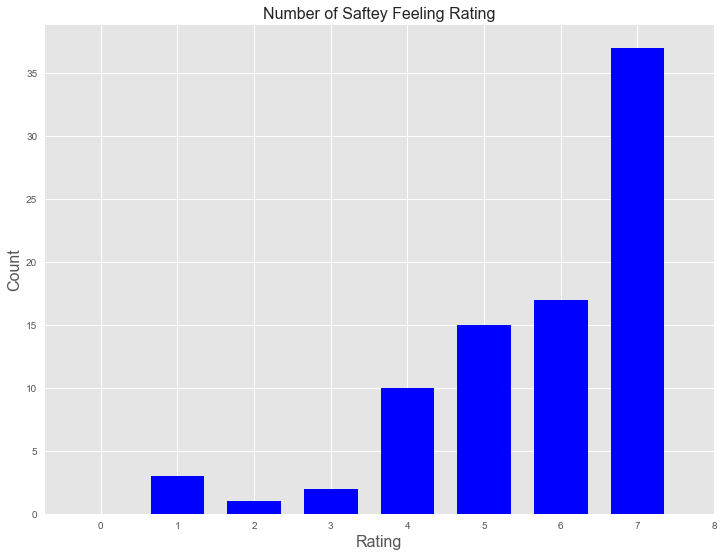

In [125]:
print("Star Rating Description:\n", exit_survey_df['Safety Feeling at Y2Y - Score'].describe())

bins=np.linspace(0, 9, 9, endpoint=False)
# groups = resturaunt_rev_df.groupby(np.digitize(resturaunt_rev_df.stars, bins))
fig, ax = plt.subplots(1,1, figsize=(12,9))
ax.hist(saftey_feeling, bins=bins, align='left', color="blue", rwidth=0.7)
ax.set_xticks(bins)
plt.title("Number of Saftey Feeling Rating", size=16)
plt.xlabel("Rating", size=16)
plt.ylabel("Count", size=16)

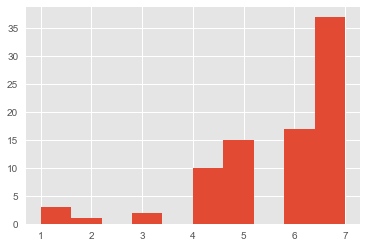

In [126]:
saftey_feeling.hist()

In [128]:
score_columns = [col for col in exit_survey_df.columns if 'Score' in col]
score_columns

['Safety Feeling at Y2Y - Score',
 'Satisfactioin experience at Y2Y - Score',
 'Recommend Y2Y to Friends to Stay - Score',
 'Satisfaction with Food - Score',
 'Did Y2Y help meet personal goals - Score',
 "I'm in a better place after stay at Y2Y - Score",
 'Stay with Y2Y helped better navigate services and systems for support - Score',
 'Plan for pathway out of homelessness - Score',
 'Case Management Supportive - Score',
 'Case Management helped meet personal goals - Score',
 'Case Management Productive - Score',
 'Legal Services Supportive - Score',
 'Additional Workshops You Want - Score',
 'Legal Productive - Score',
 'Medical Services - Score',
 'Drop-in mental health professional and other service providers - Score',
 'Advocacy and oportunities for guest leadership - Score']

In [144]:
import time

def hist_exit_scores(df, column_score_names):
    for column in column_score_names:
        scores = df[column].dropna()
        print(column, "\n", df[column].describe(), "\n")

        bins=np.linspace(0, 9, 9, endpoint=False)
        # groups = resturaunt_rev_df.groupby(np.digitize(resturaunt_rev_df.stars, bins))
        fig, ax = plt.subplots(1,1, figsize=(12,9))
        ax.hist(scores, bins=bins, align='left', color="blue", rwidth=0.7)
        ax.set_xticks(bins)
        plt.title(column, size=16)
        plt.xlabel("Rating", size=16)
        plt.ylabel("Count", size=16)
        plt.show()

Safety Feeling at Y2Y - Score 
 count    85.000000
mean      5.729412
std       1.522750
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Safety Feeling at Y2Y - Score, dtype: float64 



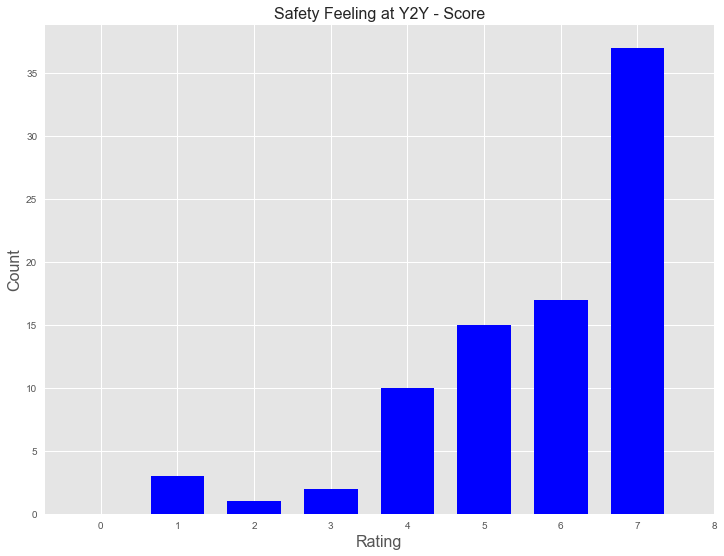

Satisfactioin experience at Y2Y - Score 
 count    84.000000
mean      5.809524
std       1.484670
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Satisfactioin experience at Y2Y - Score, dtype: float64 



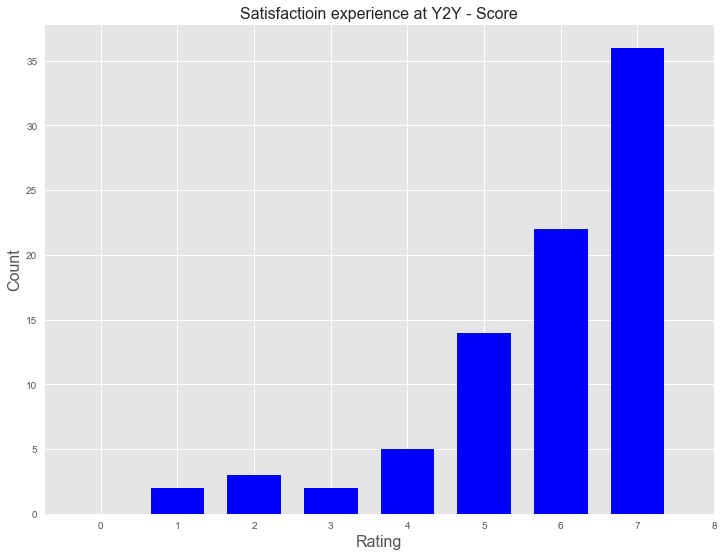

Recommend Y2Y to Friends to Stay - Score 
 count    85.000000
mean      6.341176
std       1.484467
min       1.000000
25%       6.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Recommend Y2Y to Friends to Stay - Score, dtype: float64 



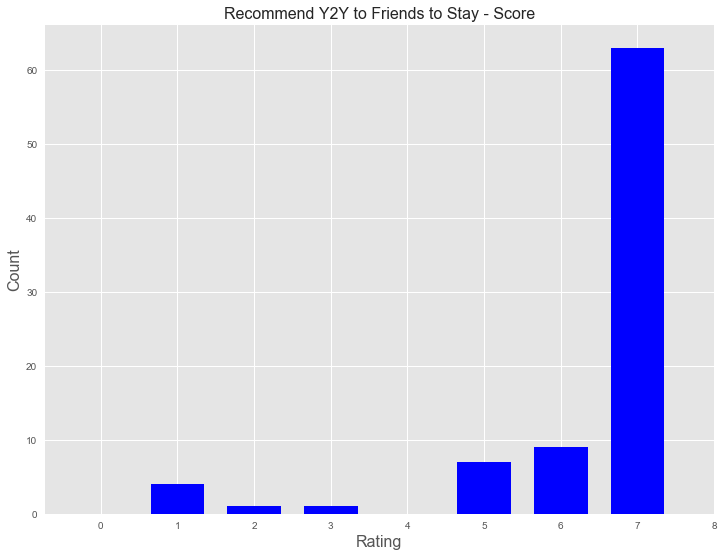

Satisfaction with Food - Score 
 count    84.000000
mean      5.226190
std       1.688738
min       1.000000
25%       4.000000
50%       5.000000
75%       7.000000
max       7.000000
Name: Satisfaction with Food - Score, dtype: float64 



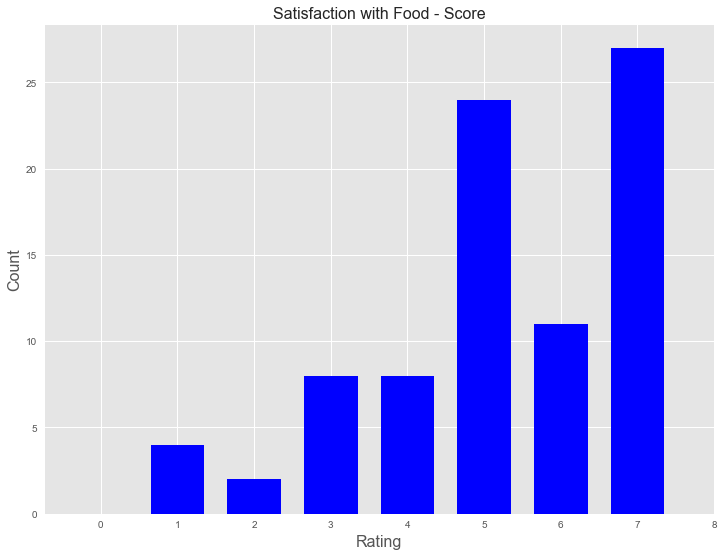

Did Y2Y help meet personal goals - Score 
 count    83.000000
mean      5.590361
std       1.645661
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Did Y2Y help meet personal goals - Score, dtype: float64 



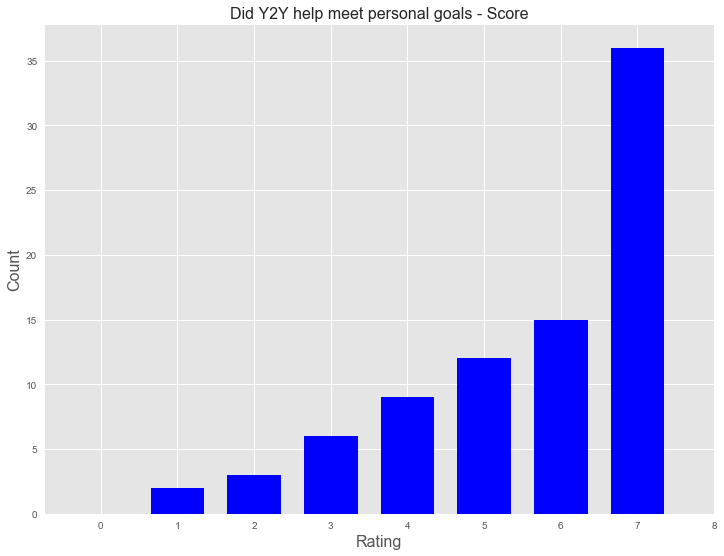

I'm in a better place after stay at Y2Y - Score 
 count    86.000000
mean      5.197674
std       1.858651
min       1.000000
25%       4.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: I'm in a better place after stay at Y2Y - Score, dtype: float64 



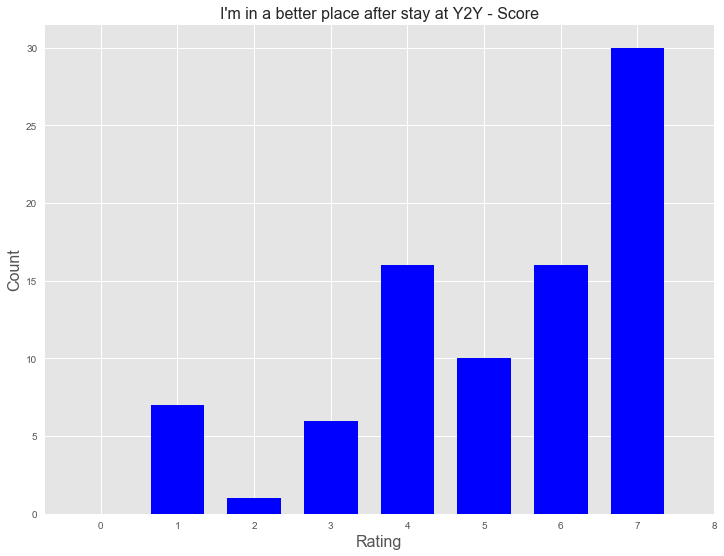

Stay with Y2Y helped better navigate services and systems for support - Score 
 count    86.000000
mean      5.406977
std       1.855852
min       1.000000
25%       4.250000
50%       6.000000
75%       7.000000
max       7.000000
Name: Stay with Y2Y helped better navigate services and systems for support - Score, dtype: float64 



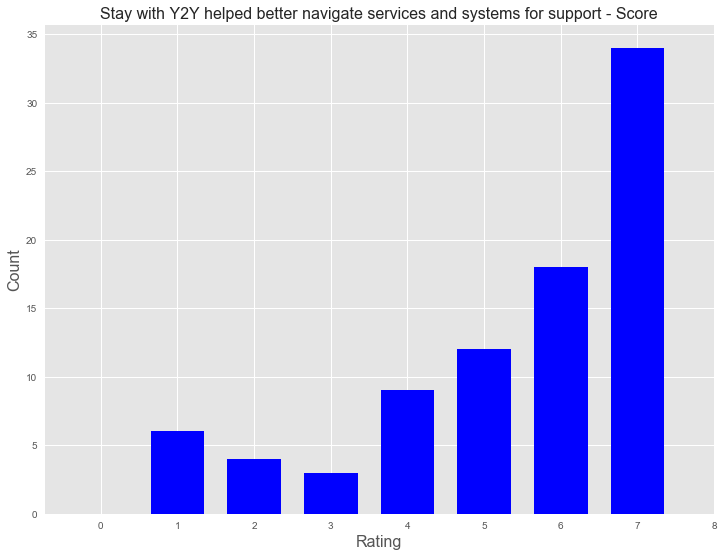

Plan for pathway out of homelessness - Score 
 count    78.000000
mean      5.628205
std       1.809850
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Plan for pathway out of homelessness - Score, dtype: float64 



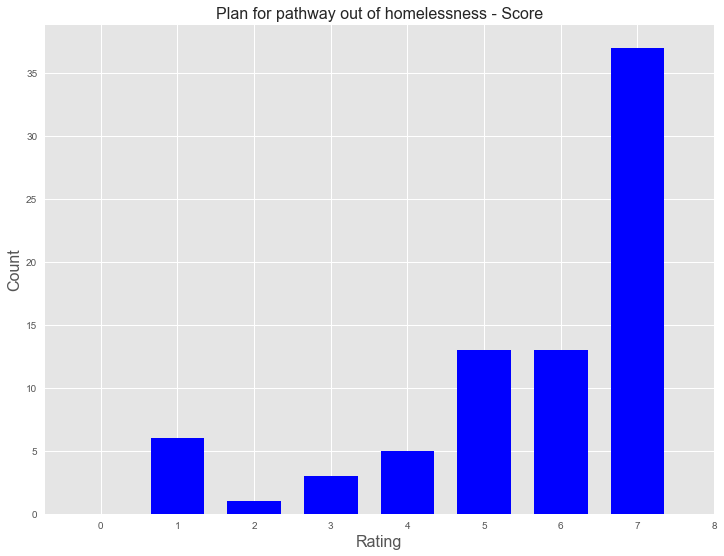

Case Management Supportive - Score 
 count    61.000000
mean      6.639344
std       0.659110
min       5.000000
25%       6.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Case Management Supportive - Score, dtype: float64 



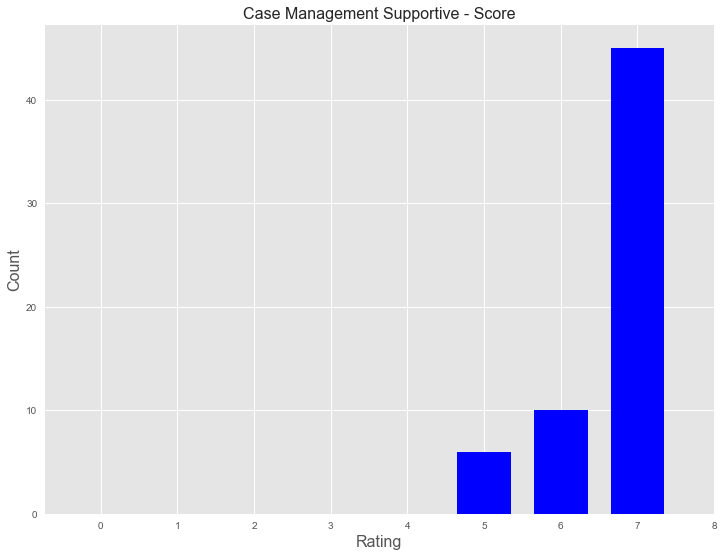

Case Management helped meet personal goals - Score 
 count    58.000000
mean      5.913793
std       1.328295
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Case Management helped meet personal goals - Score, dtype: float64 



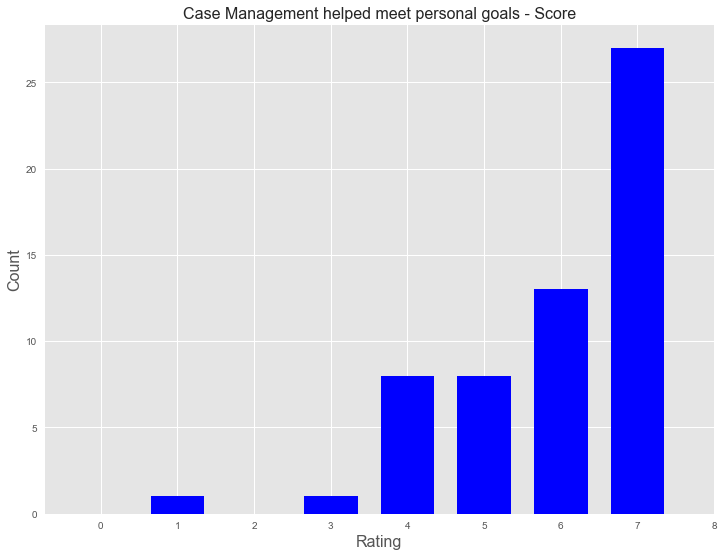

Case Management Productive - Score 
 count    61.000000
mean      6.032787
std       1.328749
min       1.000000
25%       5.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Case Management Productive - Score, dtype: float64 



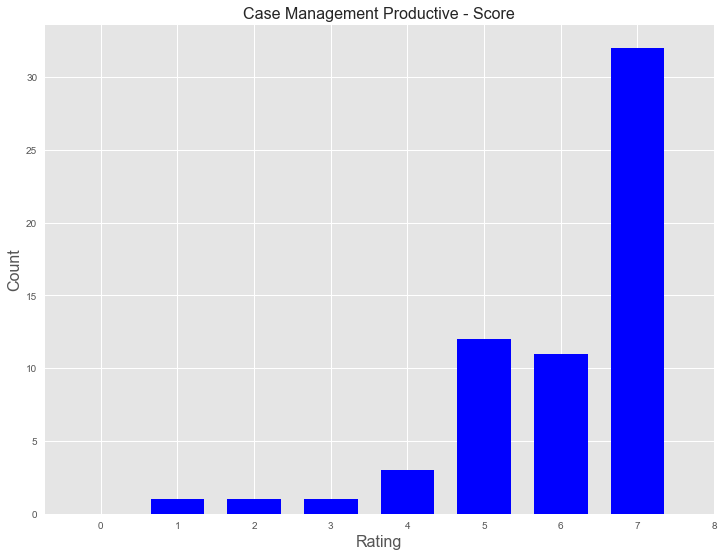

Legal Services Supportive - Score 
 count    20.000000
mean      5.900000
std       1.651156
min       1.000000
25%       5.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Legal Services Supportive - Score, dtype: float64 



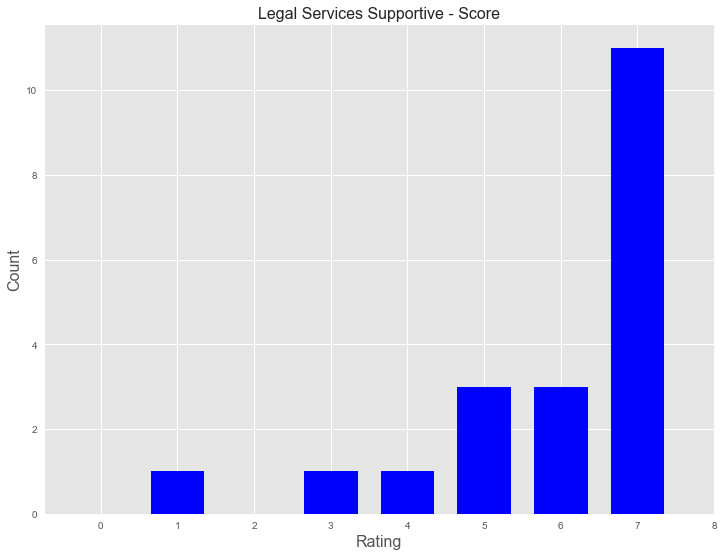

Additional Workshops You Want - Score 
 count    19.000000
mean      5.578947
std       1.894899
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Additional Workshops You Want - Score, dtype: float64 



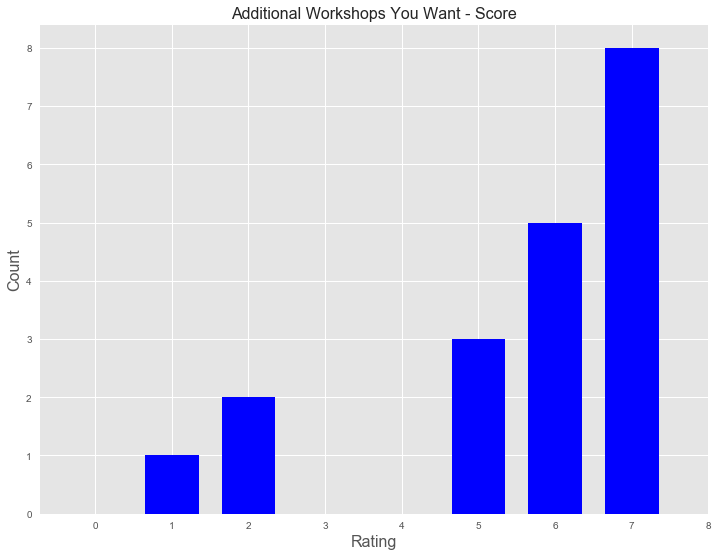

Legal Productive - Score 
 count    18.000000
mean      6.000000
std       1.847096
min       1.000000
25%       6.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Legal Productive - Score, dtype: float64 



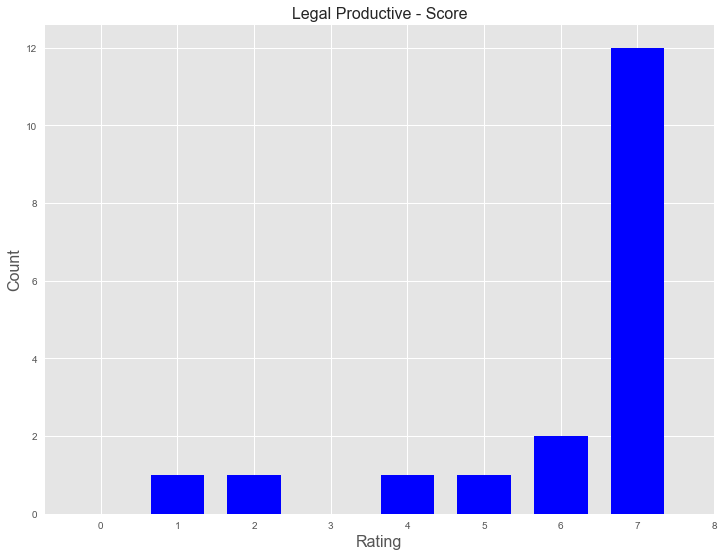

Medical Services - Score 
 count    30.000000
mean      6.266667
std       1.142693
min       2.000000
25%       6.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Medical Services - Score, dtype: float64 



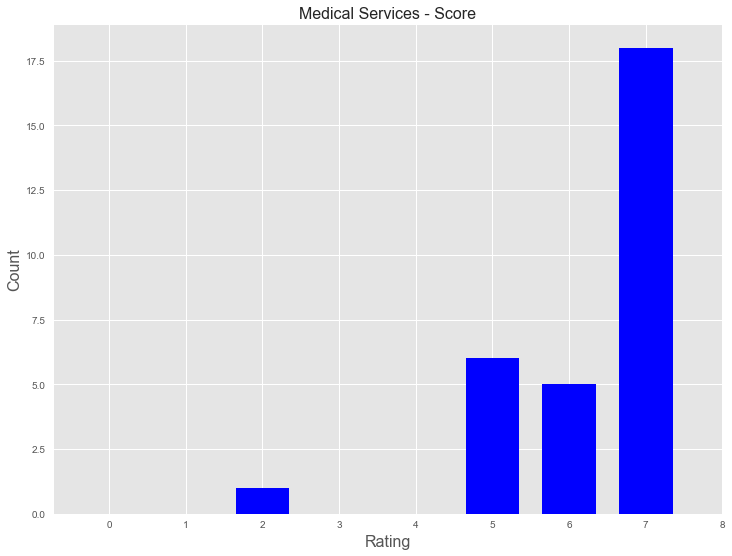

Drop-in mental health professional and other service providers - Score 
 count    18.000000
mean      6.388889
std       1.334558
min       2.000000
25%       7.000000
50%       7.000000
75%       7.000000
max       7.000000
Name: Drop-in mental health professional and other service providers - Score, dtype: float64 



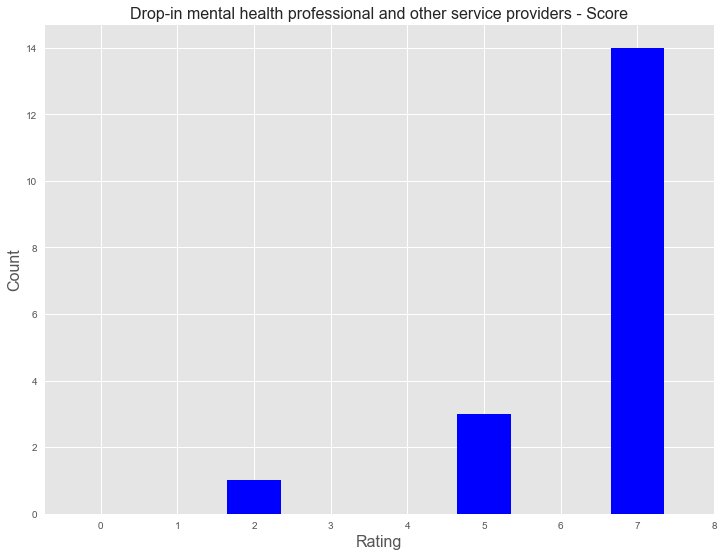

Advocacy and oportunities for guest leadership - Score 
 count    31.000000
mean      5.806452
std       1.514802
min       1.000000
25%       5.000000
50%       6.000000
75%       7.000000
max       7.000000
Name: Advocacy and oportunities for guest leadership - Score, dtype: float64 



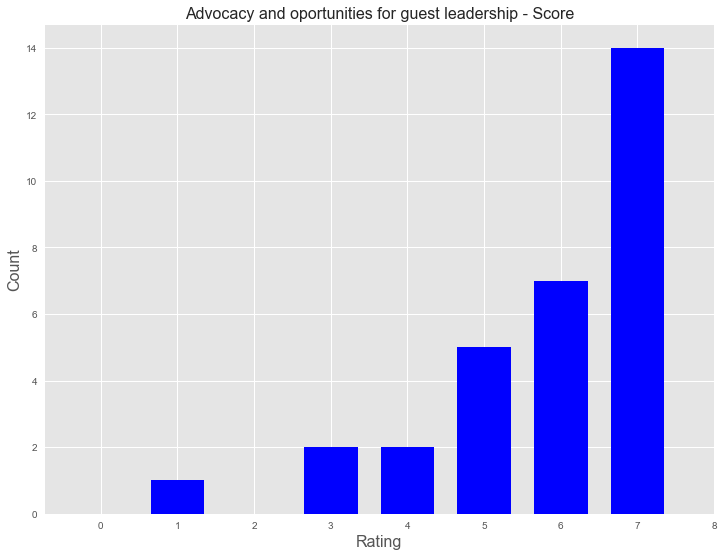

In [145]:
hist_exit_scores(exit_survey_df, score_columns)